In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from scipy import io
import matplotlib.pyplot as plt

In [12]:
iris = datasets.load_iris()
X = iris.data[0:100,0:2]
y = iris.target[0:100]
y[(y[:]==1).flatten()] = -1
y[(y[:]==0).flatten()] = 1

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_(X, Y, j, theta, text):

    # Define some helper vars for plotting
    number = len(Y)
    xmin =  min(X[:, 0])
    xmax =  max(X[:, 0])
    ymin =  min(X[:, 1])
    ymax =  max(X[:, 1])
    
    # Plot the classifier together with the data
    plt.subplot()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(text)
    plt.axis([xmin, xmax, ymin, ymax])

    plt.plot(X[:, 0:1][Y == 1], X[:, 1:2][Y == 1], c='b', marker='x', linestyle='none', markersize=5)
    plt.plot(X[:, 0:1][Y == -1], X[:, 1:2][Y == -1], c='r', marker='o', linestyle='none', markersize=5,
             fillstyle='none')

    if j == 1:  # plot
        a = np.arange(ymin, ymax, (ymax-ymin)/number)
        plt.plot(np.ones(len(a))*theta, a, 'r-')
    else:
        a = np.arange(xmin, xmax, (xmax-xmin)/number)
        plt.plot(a, np.ones(len(a))*theta, 'r-')


0
3.0


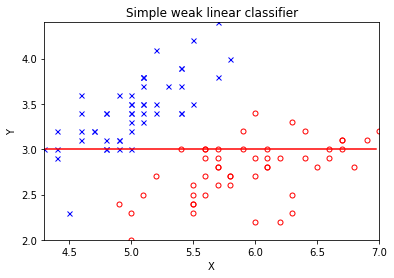

In [22]:
theta_max = np.zeros(X.shape[1])
theta_min = np.zeros(X.shape[1])
threshold_ = np.zeros(X.shape[1],dtype=np.int32)
threshold = np.zeros(X.shape[1])
sign = np.zeros(X.shape[1])
for i in range(X.shape[1]):
    temp = np.zeros(X.shape[0])
    indices = np.argsort(X[:,i])
    sorted_X = np.sort(X[:,i])
    sorted_targets = y[indices]
    for j in range(X.shape[0]):
        temp[j] = np.sum(sorted_targets[0:j+1])    
    theta_max[i] = np.max(temp)
    theta_min[i] = np.min(temp)
    if(abs(theta_max[i])>abs(theta_min[i])):
        threshold_[i] = np.argwhere(temp==theta_max[i])
        sign[i] = 1
    else:
        threshold_[i] = np.argwhere(temp==theta_min[i])
        sign[i] = -1
    threshold[i] = sorted_X.flatten()[threshold_[i]]
classification_error = np.zeros(X.shape[1])

for i in range(threshold.shape[0]):
    hypo = np.zeros(X.shape[0])
    hypo[sign[i]*X[:,i] < sign[i]*threshold[i]] = 1
    hypo[hypo==0] = -1
    classification_error[i] = np.sum(hypo!=y)/X.shape[0]
dimension = np.argmin(classification_error)
parity_sign = sign[dimension]
threshold_value = threshold[1]


print(dimension)
print(threshold_value)

plt.subplot()
plot_(X, y, dimension, threshold_value, 'Simple weak linear classifier')
plt.show()
